In [33]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [10]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


---

# Exploratory Data Analysis 

---

In [11]:
crash_data.shape

(48882, 35)

In [12]:
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

In [13]:
#filter Data to specific years
specific_year=crash_data.loc[(crash_data["Year"]==2019) | (crash_data["Year"]==2020) |
                             (crash_data["Year"]==2021) | (crash_data["Year"]==2022)]
specific_year

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32271,-111.919900,33.360130,32272,3605175,2019/01/01 07:26:00+00,2019,Lakeshore Dr,Bell De Mar Dr,400.0,Not Junction Related,...,Driverless,NaN,NaN,North,Properly Parked,NaN,NaN,NaN,33.360130,-111.919900
32272,-111.891090,33.418430,32273,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,...,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.418430,-111.891090
32273,-111.892010,33.407360,32274,3502322,2019/01/01 09:40:00+00,2019,Price Rd,Broadway Rd,-50.0,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407360,-111.892010
32274,-111.940150,33.407390,32275,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150
32275,-111.967380,33.378300,32276,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,...,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,...,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,...,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,...,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130
46465,-111.965455,33.378270,46466,4014901,2023/01/01 01:45:00+00,2022,Arizona Mills S,Baseline Rd,0.0,Intersection 4 Way 202,...,Driver,21.0,Male,South,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378270,-111.965455


In [14]:
specific_year.isna().sum()

X                         1
Y                         1
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName                0
CrossStreet             165
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 13
Gender_Drv1             277
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          13
AlcoholUse_Drv1          13
DrugUse_Drv1             13
Unittype_Two           1042
Age_Drv2               1508
Gender_Drv2            1534
Traveldirection_Two    1042
Unitaction_Two         1042
Violation1_Drv2        1508
AlcoholUse_Drv2        1508
DrugUse_Drv2           1508
Latitude                  1
Longitude                 1
dtype: int64

#### Dropping all the unnecessary columns or duplicate columns like X and Y

In [15]:
specific_year = specific_year.drop(['X', 'Y', 'OBJECTID'], axis = 1)

In [18]:
# Checking the datatype of all the features.
specific_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14196 entries, 32271 to 46466
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Incidentid           14196 non-null  int64  
 1   DateTime             14196 non-null  object 
 2   Year                 14196 non-null  int64  
 3   StreetName           14196 non-null  object 
 4   CrossStreet          14031 non-null  object 
 5   Distance             14195 non-null  float64
 6   JunctionRelation     14195 non-null  object 
 7   Totalinjuries        14195 non-null  float64
 8   Totalfatalities      14195 non-null  float64
 9   Injuryseverity       14195 non-null  object 
 10  Collisionmanner      14195 non-null  object 
 11  Lightcondition       14195 non-null  object 
 12  Weather              14195 non-null  object 
 13  SurfaceCondition     14195 non-null  object 
 14  Unittype_One         14195 non-null  object 
 15  Age_Drv1             14183 non-null  

In [21]:
# checking the statistics ofint64 and float64 datatypes such as mean, medium.
specific_year.describe()

,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,1.419600e+04,14196.000000,14195.00000,14195.000000,14195.000000,14183.000000,12688.000000,14195.000000,14195.000000
mean,3.726891e+06,2020.347210,4.58935,0.520113,0.004086,50.780018,39.675757,33.398878,-111.933300
std,1.780073e+05,1.228968,244.33336,0.854458,0.065965,44.582193,23.087382,0.028813,0.024238
min,3.457062e+06,2019.000000,-1964.00000,0.000000,0.000000,8.000000,11.000000,33.319863,-111.979146
25%,3.564758e+06,2019.000000,-55.00000,0.000000,0.000000,23.000000,24.000000,33.378270,-111.952510
50%,3.692082e+06,2020.000000,0.00000,0.000000,0.000000,33.000000,34.000000,33.407410,-111.928610
75%,3.900176e+06,2022.000000,65.00000,1.000000,0.000000,59.000000,50.000000,33.421947,-111.911260
max,4.075527e+06,2022.000000,2618.00000,9.000000,2.000000,255.000000,255.000000,33.458490,-111.877590


Column:  Incidentid


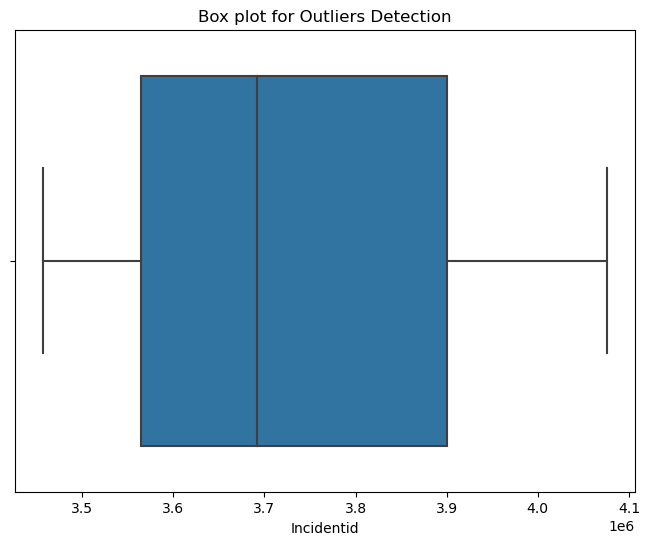

Column:  Year


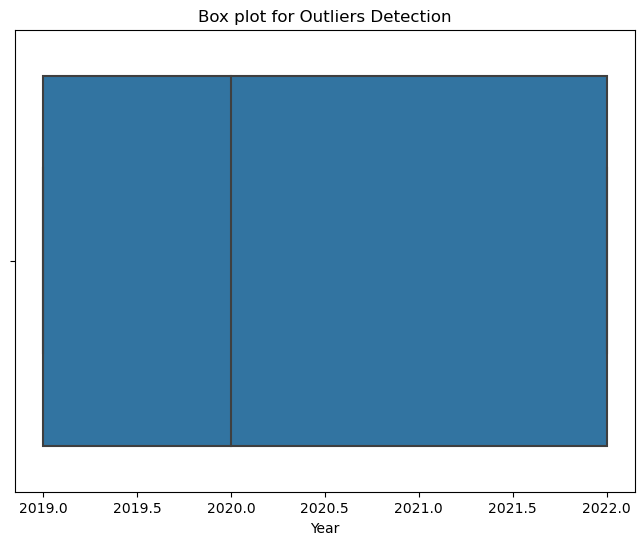

Column:  Distance


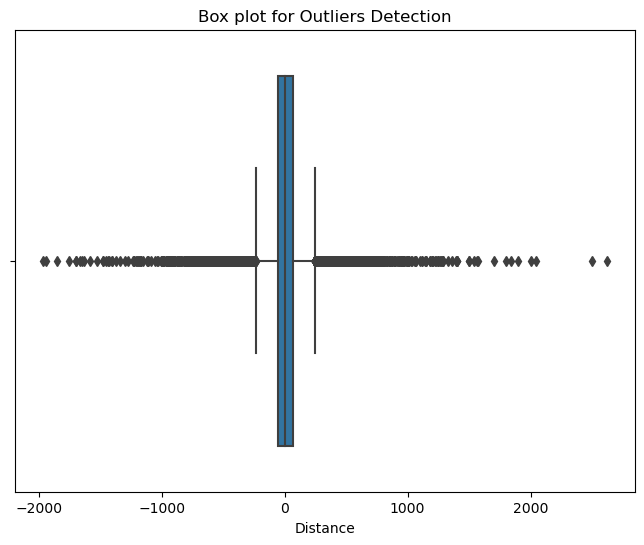

Column:  Totalinjuries


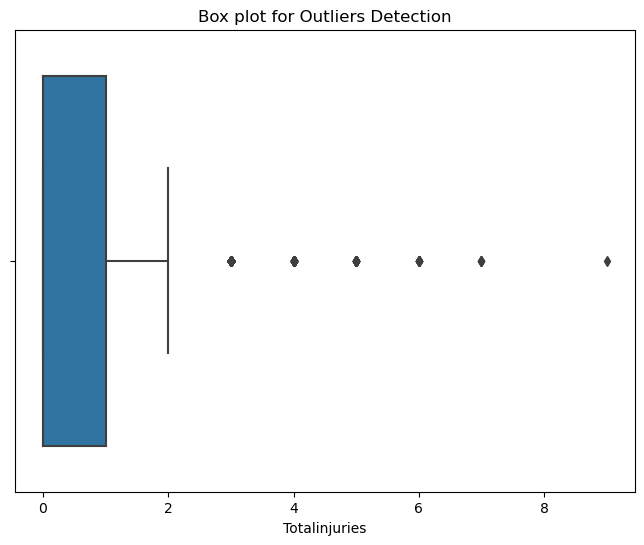

Column:  Totalfatalities


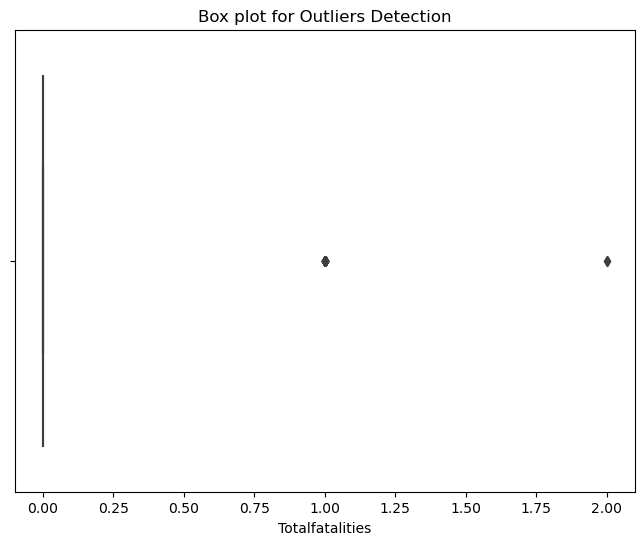

Column:  Age_Drv1


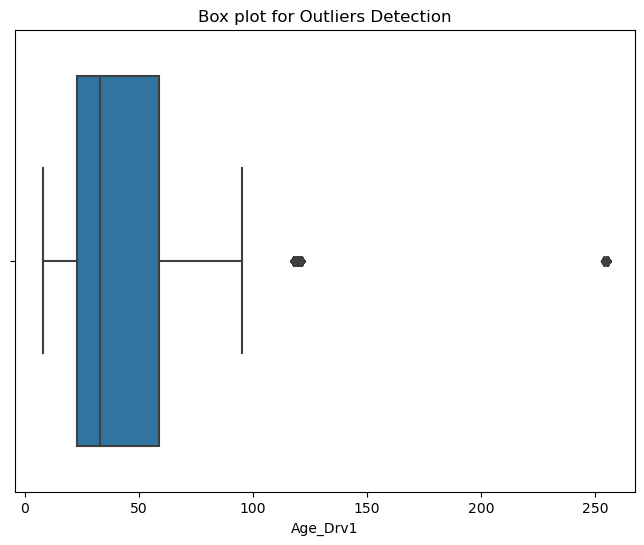

Column:  Age_Drv2


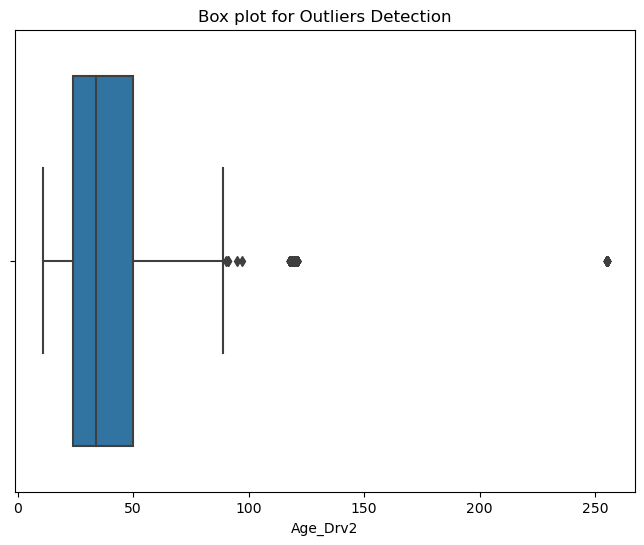

Column:  Latitude


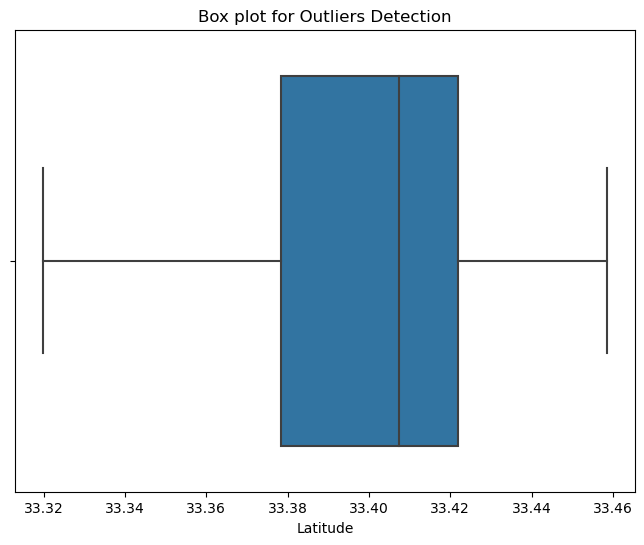

Column:  Longitude


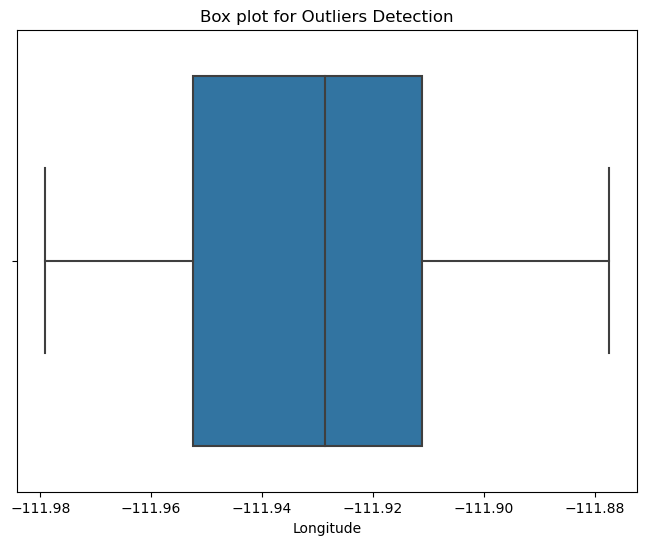

In [34]:
import seaborn as sns

#box plot for outliers
for col in specific_year.columns:
    if specific_year[col].dtypes != 'object':
        print("Column: ", col)
        plt.figure(figsize=(8,6))
        sns.boxplot(x = specific_year[col])
        plt.title('Box plot for Outliers Detection')
        plt.show()

In [40]:
# removing Outliers especially from Age:
numeric_columns = specific_year.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    
    Q1 = specific_year[col].quantile(0.25)
    Q3 = specific_year[col].quantile(0.75)
    IQR = Q3 - Q1
    
    Lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR
    
    outliers = specific_year[(specific_year[col] <= Lower_bound) | (specific_year[col]) >= Upper_bound]
    
cleaned_df = specific_year[specific_year.isin(outliers).dropna()]
cleaned_df

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32271,3605175,2019/01/01 07:26:00+00,2019,Lakeshore Dr,Bell De Mar Dr,400.0,Not Junction Related,1.0,0.0,Suspected Serious Injury,Rear End,Dark Lighted,Clear,Dry,Driver,28.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,North,Properly Parked,NaN,NaN,NaN,33.360130,-111.919900
32272,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,0.0,0.0,No Injury,Head On,Dark Unknown Lighting,Cloudy,Wet,Driver,54.0,Female,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.418430,-111.891090
32273,3502322,2019/01/01 09:40:00+00,2019,Price Rd,Broadway Rd,-50.0,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Unknown Lighting,Clear,Dry,Driver,118.0,Unknown,South,Unknown,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407360,-111.892010
32274,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,Driver,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150
32275,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,Driver,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,0.0,0.0,No Injury,Rear End,Daylight,Cloudy,Dry,Driver,58.0,Male,West,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,0.0,0.0,No Injury,Other,Daylight,Clear,Dry,Driver,23.0,Male,East,Backing,Other,No Apparent Influence,No Apparent Influence,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,1.0,0.0,Suspected Minor Injury,Left Turn,Dark Lighted,Cloudy,Dry,Driver,50.0,Female,Northeast,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130
46465,4014901,2023/01/01 01:45:00+00,2022,Arizona Mills S,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Dry,Driver,121.0,Unknown,South,Making Right Turn,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,Driver,21.0,Male,South,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378270,-111.965455


In [25]:
# checking for the modes for object datatype
specific_year.describe(include="object")

,DateTime,StreetName,CrossStreet,JunctionRelation,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
count,14196,14196,14031,14195,14195,14195,14195,14195,14195,14195,13919,14195,14195,14183,14183,14183,13154,12662,13154,13154,12688,12688,12688
unique,14079,365,486,18,5,11,7,7,7,4,3,10,23,18,2,2,4,3,10,22,16,2,2
top,2020/03/19 19:57:00+00,Rural Rd,Rural Rd,Intersection Related 206,No Injury,Rear End,Daylight,Clear,Dry,Driver,Male,East,Going Straight Ahead,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
freq,3,1308,657,4552,9109,4516,9640,12226,13422,13704,7479,3527,6652,3285,13414,14022,12371,7096,3374,6438,11613,12644,12682


In [6]:
specific_year.count()

X                      8829
Y                      8829
OBJECTID               8830
Incidentid             8830
DateTime               8830
Year                   8830
StreetName             8830
CrossStreet            8665
Distance               8829
JunctionRelation       8829
Totalinjuries          8829
Totalfatalities        8829
Injuryseverity         8829
Collisionmanner        8829
Lightcondition         8829
Weather                8829
SurfaceCondition       8829
Unittype_One           8829
Age_Drv1               8820
Gender_Drv1            8614
Traveldirection_One    8829
Unitaction_One         8829
Violation1_Drv1        8820
AlcoholUse_Drv1        8820
DrugUse_Drv1           8820
Unittype_Two           8042
Age_Drv2               7724
Gender_Drv2            7705
Traveldirection_Two    8042
Unitaction_Two         8042
Violation1_Drv2        7724
AlcoholUse_Drv2        7724
DrugUse_Drv2           7724
Latitude               8829
Longitude              8829
dtype: int64

# try treating NAN's using imputation methods.

In [7]:
#drop null rows
Filter_data=specific_year.dropna(how='any')

In [8]:
Filter_data.count()

X                      7400
Y                      7400
OBJECTID               7400
Incidentid             7400
DateTime               7400
Year                   7400
StreetName             7400
CrossStreet            7400
Distance               7400
JunctionRelation       7400
Totalinjuries          7400
Totalfatalities        7400
Injuryseverity         7400
Collisionmanner        7400
Lightcondition         7400
Weather                7400
SurfaceCondition       7400
Unittype_One           7400
Age_Drv1               7400
Gender_Drv1            7400
Traveldirection_One    7400
Unitaction_One         7400
Violation1_Drv1        7400
AlcoholUse_Drv1        7400
DrugUse_Drv1           7400
Unittype_Two           7400
Age_Drv2               7400
Gender_Drv2            7400
Traveldirection_Two    7400
Unitaction_Two         7400
Violation1_Drv2        7400
AlcoholUse_Drv2        7400
DrugUse_Drv2           7400
Latitude               7400
Longitude              7400
dtype: int64

In [9]:
Filter_data["Unittype_Two"].unique()

array(['Driver', 'Pedestrian', 'Pedalcyclist'], dtype=object)

In [10]:
#The people who use Automobile
group_data= Filter_data.groupby(["Unittype_Two"]).count()
filtered_data_df=group_data[["Incidentid"]]
filtered_data_df

,Incidentid
Unittype_Two,
Driver,7179
Pedalcyclist,88
Pedestrian,133


In [11]:
# filtering data by crashes involved with drivers
Driver_accident=Filter_data.loc[Filter_data["Unittype_Two"]== "Driver", :]
Driver_accident

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
37637,-111.942400,33.422150,37638,3614716,2020/01/01 09:02:00+00,2020,Ash Ave,University Dr,80.0,Intersection Related 206,...,Driver,28.0,Male,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400
37639,-111.945770,33.424320,37640,3608918,2020/01/01 09:41:00+00,2020,Wilson St,6th St,0.0,Intersection 4 Way 202,...,Driver,61.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770
37640,-111.922400,33.414770,37641,3614004,2020/01/01 11:04:00+00,2020,Apache Blvd,Terrace Rd,-600.0,Not Junction Related,...,Driver,42.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400
37641,-111.926260,33.434030,37642,3614179,2020/01/01 21:37:00+00,2020,Scottsdale Rd,Playa Del Norte Dr,0.0,Intersection T Inter 203,...,Driver,52.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260
37642,-111.890330,33.407480,37643,3614177,2020/01/01 23:45:00+00,2020,Price Rd,Broadway Rd,0.0,Intersection 4 Way 202,...,Driver,24.0,Male,Northwest,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407480,-111.890330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,-111.965928,33.349081,46462,4017542,2022/12/31 15:47:00+00,2022,Elliot Rd,Harl Ave,0.0,Intersection 4 Way 202,...,Driver,50.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,...,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,...,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,...,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130


In [12]:
# Create a high-level snapshot of the incident's information
Data_frame= Driver_accident[["Incidentid", "DateTime", "StreetName", "Totalinjuries", "Totalfatalities",
                             "Injuryseverity", "Lightcondition", "Weather", "SurfaceCondition", "Age_Drv2",
                             "Gender_Drv2", "Unitaction_Two", "Violation1_Drv2", "AlcoholUse_Drv2", 
                             "DrugUse_Drv2", "Latitude", "Longitude", "Year"
                            ]]
Data_frame

,Incidentid,DateTime,StreetName,Totalinjuries,Totalfatalities,Injuryseverity,Lightcondition,Weather,SurfaceCondition,Age_Drv2,Gender_Drv2,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,Year
37637,3614716,2020/01/01 09:02:00+00,Ash Ave,0.0,0.0,No Injury,Dark Lighted,Clear,Dry,28.0,Male,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400,2020
37639,3608918,2020/01/01 09:41:00+00,Wilson St,0.0,0.0,No Injury,Dark Not Lighted,Clear,Dry,61.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770,2020
37640,3614004,2020/01/01 11:04:00+00,Apache Blvd,1.0,0.0,Suspected Minor Injury,Dark Lighted,Clear,Dry,42.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400,2020
37641,3614179,2020/01/01 21:37:00+00,Scottsdale Rd,1.0,0.0,Possible Injury,Daylight,Clear,Dry,52.0,Female,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260,2020
37642,3614177,2020/01/01 23:45:00+00,Price Rd,0.0,0.0,No Injury,Daylight,Clear,Dry,24.0,Male,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407480,-111.890330,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,4017542,2022/12/31 15:47:00+00,Elliot Rd,0.0,0.0,No Injury,Unknown 51,Unknown,Dry,50.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928,2022
46462,4016095,2022/12/31 20:35:00+00,University Dr,0.0,0.0,No Injury,Daylight,Cloudy,Dry,22.0,Female,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653,2022
46463,4017552,2022/12/31 21:55:00+00,Mill Ave,0.0,0.0,No Injury,Daylight,Clear,Dry,46.0,Female,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610,2022
46464,4014475,2023/01/01 01:02:00+00,Baseline Rd,1.0,0.0,Suspected Minor Injury,Dark Lighted,Cloudy,Dry,19.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130,2022


In [13]:
#rename columns
new_data_df=Data_frame.rename(columns={"Age_Drv2": "Age",
                                        "Gender_Drv2": "Gender",
                                        "Unitaction_Two": "Unitaction",
                                        "Violation1_Drv2": "Violation",
                                        "AlcoholUse_Drv2": "AlcoholUse",
                                        "DrugUse_Drv2": "DrugUse",
                                        "DrugUse_Drv2": "DrugUse",
                                        "Totalinjuries": "Total injuries",
                                        "Totalfatalities" : "Total fatalities"
                                        })
new_data_df

,Incidentid,DateTime,StreetName,Total injuries,Total fatalities,Injuryseverity,Lightcondition,Weather,SurfaceCondition,Age,Gender,Unitaction,Violation,AlcoholUse,DrugUse,Latitude,Longitude,Year
37637,3614716,2020/01/01 09:02:00+00,Ash Ave,0.0,0.0,No Injury,Dark Lighted,Clear,Dry,28.0,Male,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400,2020
37639,3608918,2020/01/01 09:41:00+00,Wilson St,0.0,0.0,No Injury,Dark Not Lighted,Clear,Dry,61.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770,2020
37640,3614004,2020/01/01 11:04:00+00,Apache Blvd,1.0,0.0,Suspected Minor Injury,Dark Lighted,Clear,Dry,42.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400,2020
37641,3614179,2020/01/01 21:37:00+00,Scottsdale Rd,1.0,0.0,Possible Injury,Daylight,Clear,Dry,52.0,Female,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260,2020
37642,3614177,2020/01/01 23:45:00+00,Price Rd,0.0,0.0,No Injury,Daylight,Clear,Dry,24.0,Male,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407480,-111.890330,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,4017542,2022/12/31 15:47:00+00,Elliot Rd,0.0,0.0,No Injury,Unknown 51,Unknown,Dry,50.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928,2022
46462,4016095,2022/12/31 20:35:00+00,University Dr,0.0,0.0,No Injury,Daylight,Cloudy,Dry,22.0,Female,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653,2022
46463,4017552,2022/12/31 21:55:00+00,Mill Ave,0.0,0.0,No Injury,Daylight,Clear,Dry,46.0,Female,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610,2022
46464,4014475,2023/01/01 01:02:00+00,Baseline Rd,1.0,0.0,Suspected Minor Injury,Dark Lighted,Cloudy,Dry,19.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130,2022


### Save the cleaned dataframe into csv file and you can import in the other jupyter notebook

In [15]:
#count total injuries and fatalities
total_injuries=new_data_df.groupby(["Year"]).count()
total_injuries_df=total_injuries[["Total injuries", "Total fatalities"]]
total_injuries_df

,Total injuries,Total fatalities
Year,,
2020,1896,1896
2021,2224,2224
2022,3059,3059


In [16]:
# Create bins for age groups
bins = [15, 25, 40, 60, 85]
labels = ['Age 15-24', 'Age 25-39', 'Age 40-59', 'Age 60-85']

# Create a new column 'AgeGroup' based on the bins
new_data_df['AgeGroup'] = pd.cut(new_data_df['Age'], bins=bins, labels=labels, right=False)

# Create a new column 'WeatherSurface' based on the combination of 'Weather' and 'SurfaceCondition'
new_data_df['WeatherSurface'] = new_data_df['Weather'] + ' ' + new_data_df['SurfaceCondition']

# Group by 'AgeGroup' and 'WeatherSurface', then count occurrences
age_and_weather_counts = new_data_df.groupby(['AgeGroup', 'WeatherSurface']).size().unstack()

# Rename the columns for clarity
age_and_weather_counts.columns = [f"{col} Count" for col in age_and_weather_counts.columns]

# Reset index for a cleaner DataFrame
age_and_weather_counts.reset_index(inplace=True)

# Display the result
age_and_weather_counts

C:\Users\tina\AppData\Local\Temp\ipykernel_27952\3259952404.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_and_weather_counts = new_data_df.groupby(['AgeGroup', 'WeatherSurface']).size().unstack()


,AgeGroup,Blowing Sand Soil Dirt Dry Count,Clear Dry Count,Clear Mud Dirt Gravel Count,Clear Snow Count,Clear Unknown Count,Clear Water Standing Moving Count,Clear Wet Count,Cloudy Dry Count,Cloudy Unknown Count,Cloudy Wet Count,Fog Smog Smoke Dry Count,Rain Dry Count,Rain Water Standing Moving Count,Rain Wet Count,Sleet Hail Freezing Rain Or Drizzle Dry Count,Unknown Dry Count,Unknown Mud Dirt Gravel Count,Unknown Unknown Count,Unknown Wet Count
0,Age 15-24,1,1684,1,1,9,0,7,124,0,11,1,7,0,38,1,39,0,20,2
1,Age 25-39,0,2098,0,0,13,0,7,156,1,19,2,6,0,35,0,44,0,13,0
2,Age 40-59,0,1602,1,0,9,1,3,132,2,11,0,2,1,31,0,38,1,12,0
3,Age 60-85,1,702,0,0,11,0,2,58,0,10,0,3,0,13,0,12,0,4,0


In [17]:
# Select desired columns
final_filter_age_weather_data = age_and_weather_counts[["AgeGroup", "Clear Dry Count", 
                                 "Cloudy Dry Count",
                                 "Rain Wet Count"
                                ]]
# Rename columns
rename_age_and_weather_counts = final_filter_age_weather_data.rename(columns={
    "Clear Dry Count": "Clear weather with dry surface",
    "Cloudy Dry Count": "Cloudy weather with dry surface",
    "Rain Wet Count": "Rainy weather with wet surface",
})
rename_age_and_weather_counts

,AgeGroup,Clear weather with dry surface,Cloudy weather with dry surface,Rainy weather with wet surface
0,Age 15-24,1684,124,38
1,Age 25-39,2098,156,35
2,Age 40-59,1602,132,31
3,Age 60-85,702,58,13


<Axes: title={'center': 'Total Number of People per Road Condition'}, xlabel='Age', ylabel='Number of Incidents'>

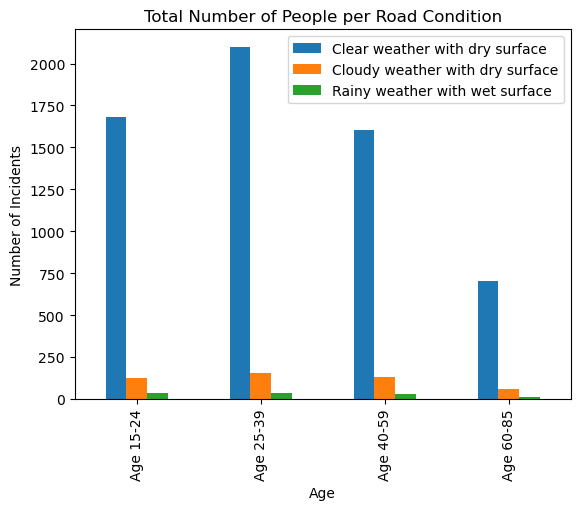

In [20]:
#Generate a bar plot showing the total number of people per road condition.
Figure1=rename_age_and_weather_counts.plot(kind="bar", xlabel="Age", ylabel="Number of Incidents")
xticklabels=age_and_weather_counts["AgeGroup"].unique()
Figure1.set_xticklabels(xticklabels, rotation=90)
plt.title("Total Number of People per Road Condition")
Figure1

In [21]:
print("Q1=Is there a correlation between age and road conditions that cause automobile accidents in City of Tempe during the year 2020-2022?")
print("Answer:  ")

Q1=Is there a correlation between age and road conditions that cause automobile accidents in City of Tempe during the year 2020-2022?
Answer:  


In [22]:
#question2: find people who use alcohol
Driver_accident["AlcoholUse_Drv2"].unique()

array(['No Apparent Influence', 'Alcohol'], dtype=object)

In [23]:
#filter data who use alcohol
cause_accident=new_data_df.loc[(new_data_df["AlcoholUse"]== "Alcohol")                        ]
specific_coloumn=cause_accident[["Incidentid",
                                "AlcoholUse", "Gender"
                                ]]
specific_coloumn

,Incidentid,AlcoholUse,Gender
37908,3629760,Alcohol,Male
38807,3666774,Alcohol,Male
38843,3667268,Alcohol,Male
38882,3663894,Alcohol,Male
39302,3688872,Alcohol,Male
39518,3703041,Alcohol,Male
39699,3716882,Alcohol,Female
40894,3778434,Alcohol,Male
41999,3837376,Alcohol,Male
42258,3849084,Alcohol,Male


In [24]:
alcohol_accident=specific_coloumn.groupby("Gender").count()
alcohol_accident

,Incidentid,AlcoholUse
Gender,,
Female,11,11
Male,17,17


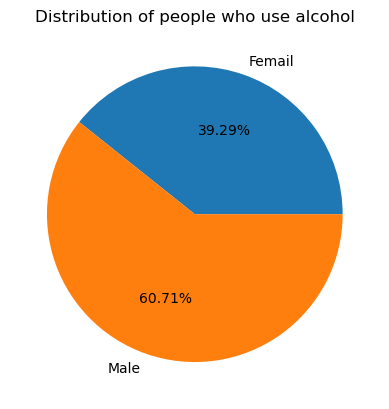

In [26]:
# Generate a pie plot showing the distribution of people who use alcohol
labels=["Femail", "Male"]
alcohol_accident = specific_coloumn.groupby("Gender")["AlcoholUse"].count()
plt.pie(alcohol_accident, autopct='%2.2f%%', labels=labels)
plt.title("Distribution of people who use alcohol")
plt.show()